In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from scipy.stats import norm
from sklearn import preprocessing , linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from random import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\Andrea1\\Desktop\\project3\\environment3/andSVM_2.csv")

In [3]:
print(df)

   X1  X2  y
0   0   0  0
1   0   1  0
2   1   0  0
3   1   1  1
4   2   3  1
5   3   2  1
6   0  -1  0


In [4]:
X=np.array(df[df.columns[0:-1]])
Y=np.array(df[[df.columns[-1]]])

#### Perceptron

In [10]:
## Transfer function
def salida(w,X):
    Vx= X.dot(w[1:]) +w[0]
    if(Vx<0):
        Vx=0
    else:
        Vx=1
    return Vx
## Training function
def entrena(X,y,w,la=0.0,eta=0.01):
    
    for i in range(len(X)):
        error=y[i]-salida(w,X[i])
        #print (y[i],salida(w,X[i]), error)
        w[0]=w[0]+eta*(error)
        w[1:]=w[1:]+eta*(error*X[i])-la*w[1:]
        
        
    return w

## Entrenar el perceptron y graficar la barrera

In [27]:
Wi=np.random.rand(len(X[0])+1)
for i in range(700):
    Wi=entrena(X,Y,Wi,la=0.0,eta=0.01)

In [28]:
corteX2=-Wi[0]/Wi[2]
corteX1=-Wi[0]/Wi[1]

In [29]:
pendiente=corteX2/corteX1

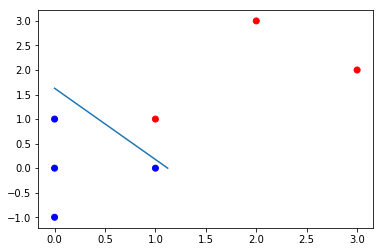

In [30]:
plt.scatter(X[:,0],X[:,1],c=['red' if i==1 else 'blue' for i in Y])
y_1, x_1 = [0, corteX2], [corteX1,0]
plt.plot(x_1, y_1)

# Train an SVM  using sklearn.svm.svc

In [31]:
mod=SVC(C=100, kernel='linear')

In [33]:
mod.fit(X,Y)

c:\users\andrea1\desktop\project3\environment3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [36]:


pred=mod.predict(X)
from sklearn.metrics import classification_report,confusion_matrix 
print(classification_report(Y,pred))
print(confusion_matrix(Y,pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         4
          1       1.00      1.00      1.00         3

avg / total       1.00      1.00      1.00         7

[[4 0]
 [0 3]]


In [38]:
b=mod.intercept_
w1=mod.coef_[0][0]
w2=mod.coef_[0][1]

In [39]:
mod.support_vectors_

array([[ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  1.]])

In [52]:
vec1 = mod.support_vectors_[0]
vec2 = mod.support_vectors_[-1]

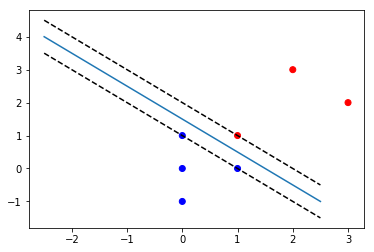

In [44]:
plt.scatter(X[:,0],X[:,1],c=['red' if i==1 else 'blue' for i in Y])
x=np.linspace(-2.5,2.5,10)
plt.plot(x,-(b/w2)-(w1/w2)*x)
plt.plot(x,-(w1/w2)*x+(vec1[1]-(-(w1/w2))*vec1[0]),'k--')
plt.plot(x,-(w1/w2)*x+(vec2[1]-(-(w1/w2))*vec2[0]),'k--')

# SVM Circulo

In [66]:
#Para generar los datos del circulo usamos a^2+b^2<1. 
#Si se cumple con la propiedad, entonces la variable de salida y es 1, que indica que el punto esta dentro del circulo
lim = 1.5
n = 3000
a = np.random.uniform(-lim,lim,n)
b = np.random.uniform(-lim,lim,n)

y = a*a + b*b <= 1
y = y.astype(int)
X=np.asarray([[a[i],b[i]] for i in range(0,n)])
Y=np.asarray([[yi] for yi in y])

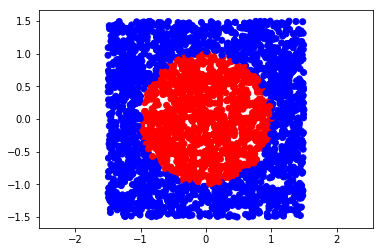

In [67]:
#Visualizamos como los datos efectivamente estan sepadados por dentro y fuera del circulo
plt.scatter(X[:,0],X[:,1],c=['red' if i==1 else 'blue' for i in Y])
plt.ylim([-1.5,1.5])
plt.xlim([-1.5,1.5])
plt.axis('equal')
plt.show()

In [68]:
svm=SVC(C=1,kernel='linear',probability=True)
svm.fit(X,Y)
pred=svm.predict(X) 
print(classification_report(Y,pred))
print(confusion_matrix(Y,pred))

c:\users\andrea1\desktop\project3\environment3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


             precision    recall  f1-score   support

          0       0.64      1.00      0.78      1924
          1       0.00      0.00      0.00      1076

avg / total       0.41      0.64      0.50      3000

[[1924    0]
 [1076    0]]


c:\users\andrea1\desktop\project3\environment3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [74]:
print('Accuracy')
(confusion_matrix(Y,pred)[0][0]+confusion_matrix(Y,pred)[1][1])/sum(sum(confusion_matrix(Y,pred)))

Accuracy


0.64133333333333331

In [75]:
b=mod.intercept_
w1=svm.coef_[0][0]
w2=svm.coef_[0][1]
A=svm.support_vectors_

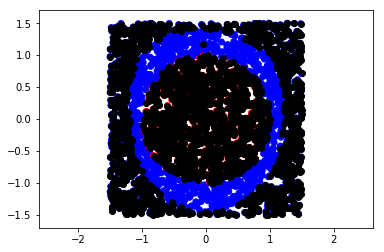

In [77]:
plt.scatter(X[:,0],X[:,1],c=['red' if i==1 else 'blue' for i in Y])
plt.scatter(A[:,0],A[:,1],c="black")
plt.ylim([-1.5,1.5])
plt.xlim([-1.5,1.5])
plt.axis('equal')
plt.show()

# RBF

In [78]:
svm=SVC(C=1,kernel='rbf',probability=True)
svm.fit(X,Y)
pred=svm.predict(X) 
print(classification_report(Y,pred))
print(confusion_matrix(Y,pred))

c:\users\andrea1\desktop\project3\environment3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


             precision    recall  f1-score   support

          0       1.00      0.99      0.99      1924
          1       0.99      0.99      0.99      1076

avg / total       0.99      0.99      0.99      3000

[[1908   16]
 [   6 1070]]


In [79]:
print('Accuracy')
(confusion_matrix(Y,pred)[0][0]+confusion_matrix(Y,pred)[1][1])/sum(sum(confusion_matrix(Y,pred)))

Accuracy


0.9926666666666667

(-1.6594561328332531,
 1.6597305660611519,
 -1.6647064617534313,
 1.6650524615661275)

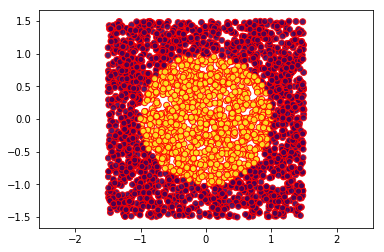

In [92]:
plt.scatter(X[:,0], X[:,1], c = pred, edgecolor = 'red',  alpha = 0.9)

plt.axis('equal')